# Creating the final calculation

## imports

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
locations = pd.read_csv('../csv_folder/total_centrepoints.csv')
locations

,Unnamed: 0,longitude,latitude
0,0,-109.0000,37.0000
1,1,-109.0000,37.0427
2,2,-109.0000,37.0854
3,3,-109.0000,37.1281
4,4,-109.0000,37.1708
...,...,...,...
15411,15411,-102.0399,40.8003
15412,15412,-102.0399,40.8430
15413,15413,-102.0399,40.8857
15414,15414,-102.0399,40.9284


In [3]:
layers = np.load('/Users/timfrith/code/Alastair908/GlobalGreening/raw_data/20_predictions_single.npy')

In [4]:
im_frame2 = Image.open('/Users/timfrith/code/Alastair908/GlobalGreening/raw_data/NDVI_2002/image0_-109.0_37.0.png')
np_frame2 = np.array(im_frame2)

In [5]:
im_frame6 = Image.open('/Users/timfrith/code/Alastair908/GlobalGreening/raw_data/NDVI_2006/image0_-109.0_37.0.png')
np_frame6 = np.array(im_frame6)

In [6]:
im_frame10 = Image.open('/Users/timfrith/code/Alastair908/GlobalGreening/raw_data/NDVI_2010/image0_-109.0_37.0.png')
np_frame10 = np.array(im_frame10)

In [7]:
im_frame14 = Image.open('/Users/timfrith/code/Alastair908/GlobalGreening/raw_data/NDVI_2014/image0_-109.0_37.0.png')
np_frame14 = np.array(im_frame10)

In [8]:
layer0 = layers[0]

In [10]:
point0 = (layer0[:,:,0] * np_frame2)

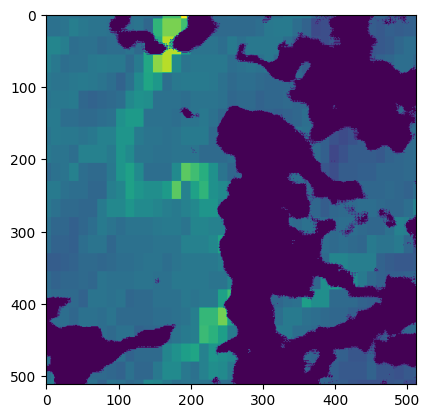

In [11]:
plt.imshow(point0)

In [12]:
point0[np.nonzero(point0)].mean()

29.305974803542473

In [17]:
def load_images_ndvi(dataset_root_folder, images_dir, DataFrame_locations):
    images_dataset = []
    
    for index,row in DataFrame_locations.iterrows():
        id_ = index
        longitude = row['longitude']
        latitude = row['latitude']
        
        image_file =f'image{id_}_{longitude}_{latitude}.png'
        path_image = f'{dataset_root_folder}/{images_dir}/{image_file}'
        # print(f'loading the image from these file {path_image}')
        
        image = Image.open(path_image)
        type(image)
        if np.asarray(image).shape  == (512,512,2): 
            image = image.convert('L')
        
        image = np.asarray(image)
        images_dataset.append(image)
        # print(f'appended image of size {image.shape}')
    
    images_dataset = np.array(images_dataset)
    
    return images_dataset

def ndvi_mean(mask, image):
    '''Calculate the mean result of the mask and image'''
        
    np_image = np.array(image)
    
    layered = mask[:,:,0] * np_image
    
    mean =  layered[np.nonzero(layered)].mean()
    
    return mean

def ndvi_mid_layer(mask, image):
    
    np_image = np.array(image)
    
    layered = mask[:,:,0] * np_image
    
    return layered

In [14]:
ndvi_2006 = load_images_ndvi('/Users/timfrith/code/Alastair908/GlobalGreening/raw_data','NDVI_2006',locations)

In [15]:
for i in range(20):
    print(ndvi_mean(layers[i],ndvi_2006[i]))

30.35384332103803
26.475028746819742
25.283686283686283
27.727476682108062
46.87410046564131
54.86047776661166
33.94725495832136
33.874123876276094
44.365378505120106
40.95361946391626
44.04661026989882
54.21538419884118
67.60601133717098
70.589412709337
71.2761271957983
67.5185234714038
64.81016649187205
63.709776572280674
73.34532966818426
61.71439995406975


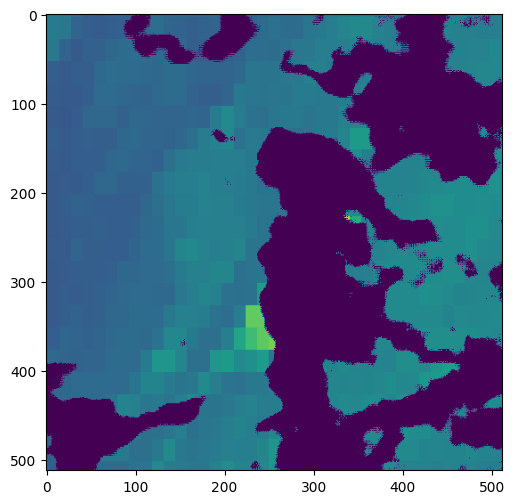

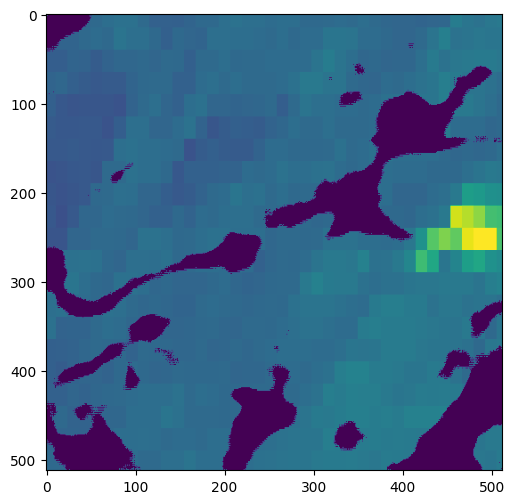

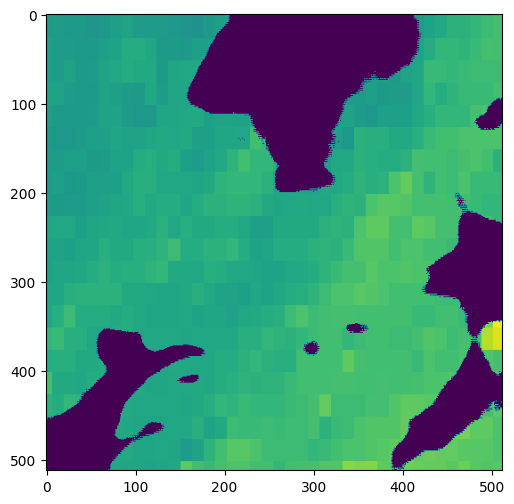

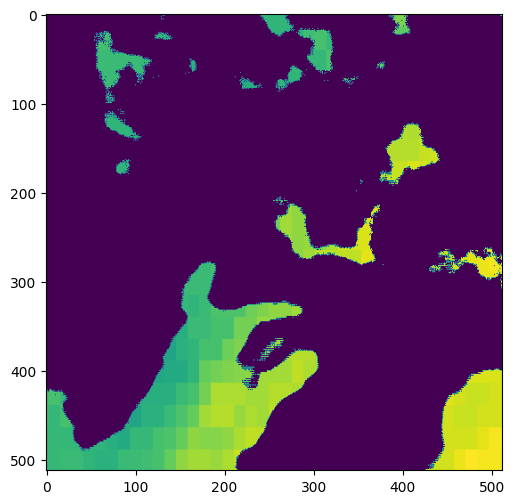

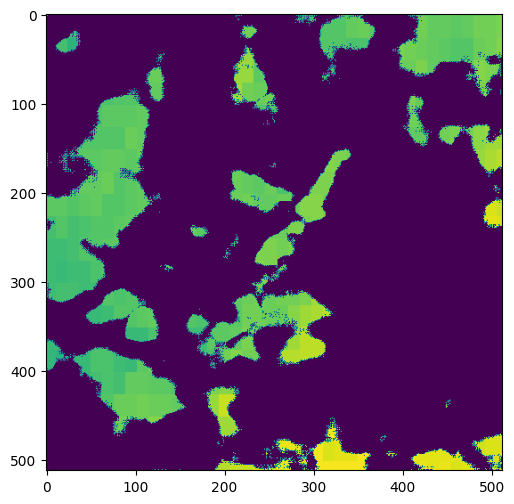

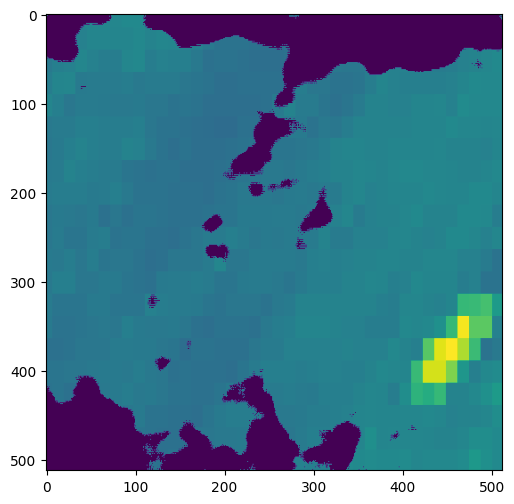

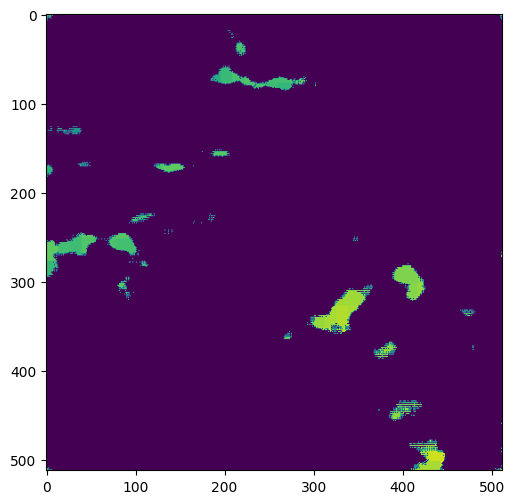

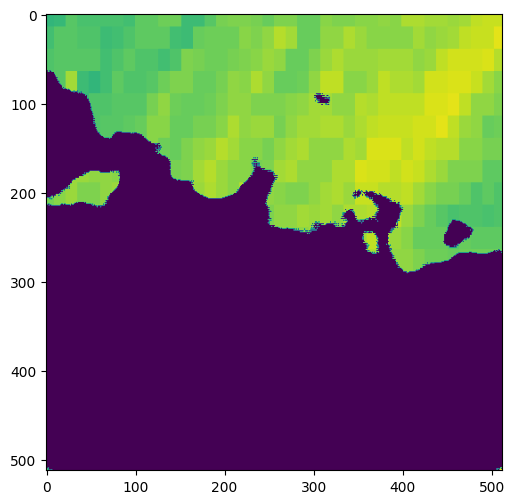

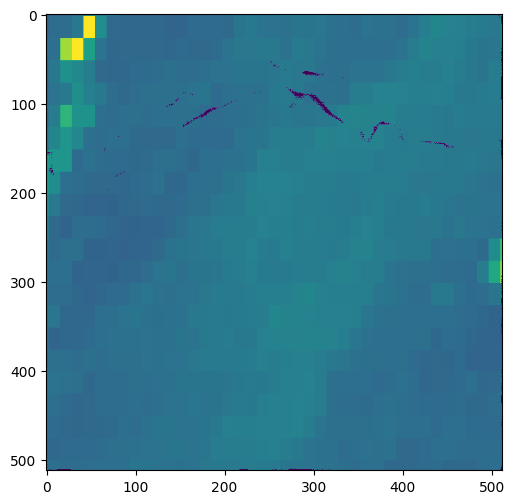

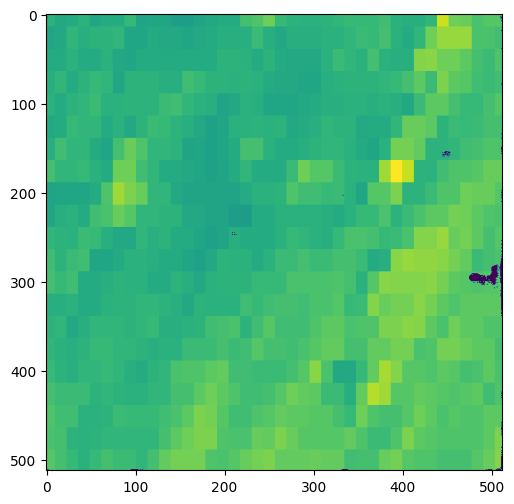

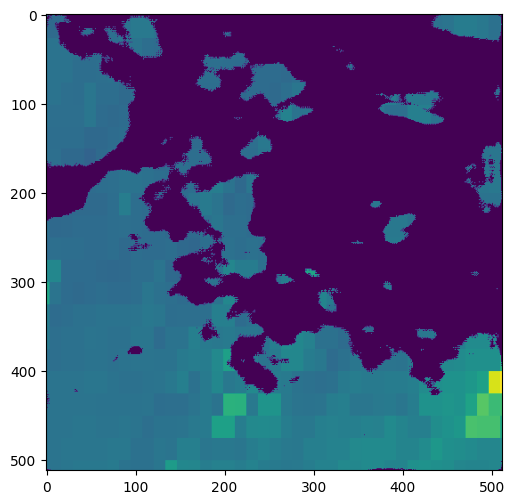

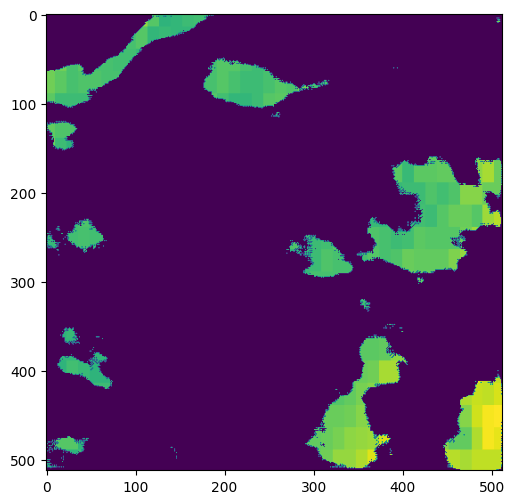

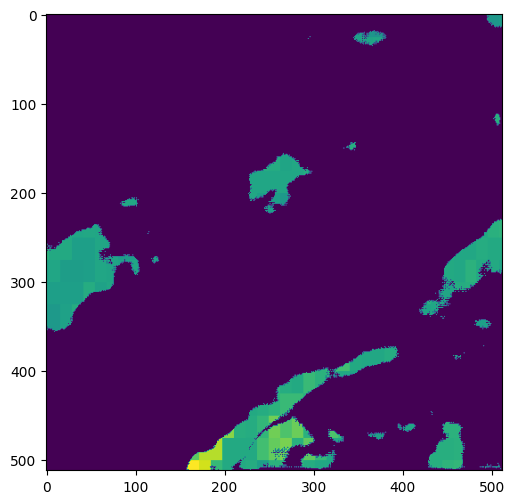

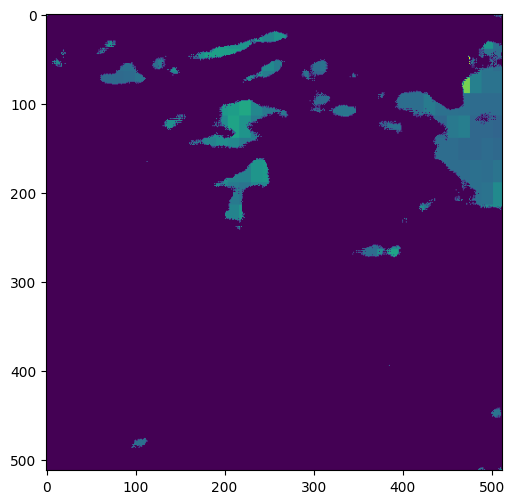

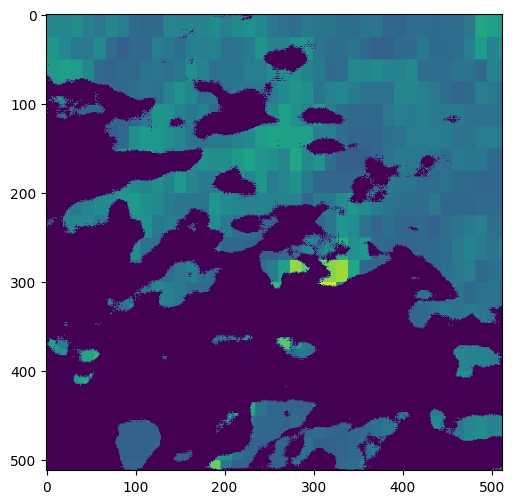

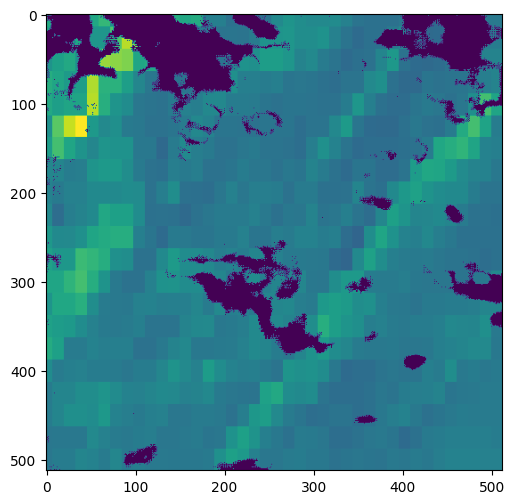

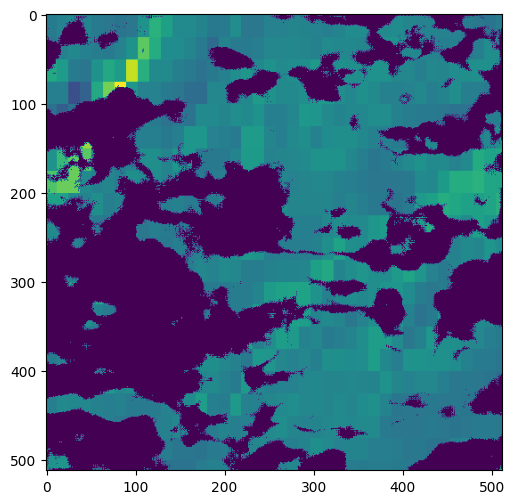

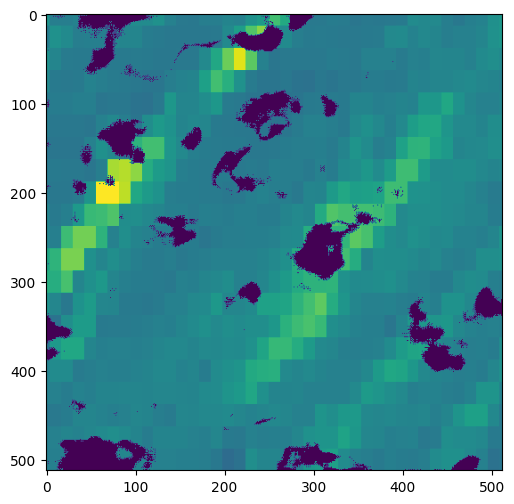

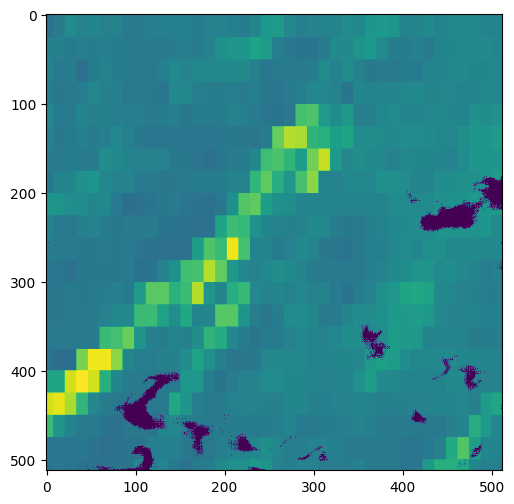

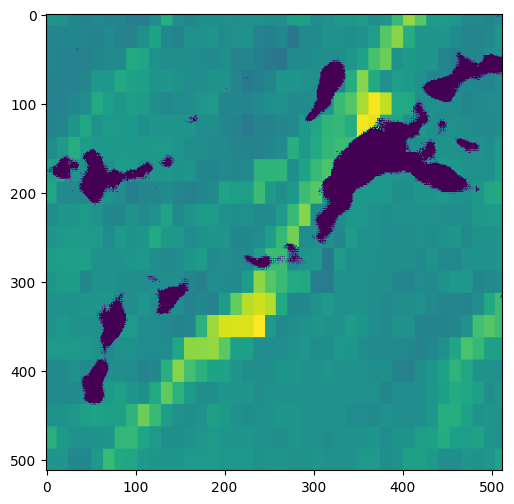

In [22]:
for i in range(20):
    fig = plt.figure(figsize=(20,8))

    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(ndvi_mid_layer(layers[i],ndvi_2006[i + 10000]))